In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


# Steps to Perform Linear Regression

1. **Load the Dataset**  
   Import and load the dataset into your working environment.

2. **Train-Test Split**  
   Divide the dataset into training and testing sets to evaluate the model’s performance.

3. **Standardize the Data**  
   Standardize the independent variables to ensure they are on the same scale.

   **Why Standardize the Data?**  
   - If the values of features (X) are much higher, it can lead to a high cost function, which is directly related to gradient descent.  
   - Standardization helps reduce the cost function, ensuring efficient convergence.  
   - Standardizing is especially important for distance-based and optimization-based algorithms.  

   The Z-score formula is applied to both `X_train` and `X_test` to normalize the data.  


In [3]:
df = pd.read_csv("california.csv")

In [4]:
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = regression.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred=y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
rmse = np.sqrt(mse)
print(f" mean square error is {mse}" )
print(f" mean absolute error is  {mae}")
print(f" r2 score is  {score}")
print(f" root mean square error is {rmse}")

 mean square error is 0.508893335115895
 mean absolute error is  0.5277731845889772
 r2 score is  0.6223138107295286
 root mean square error is 0.7133676016724442


In [19]:
#assumptions
residuals = y_test-y_pred

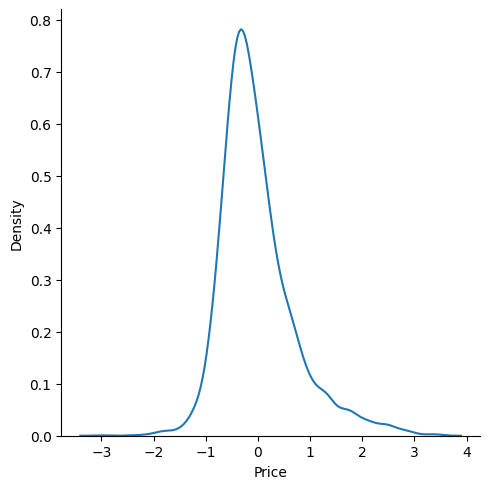

In [20]:
import seaborn as sns 
sns.displot(residuals,kind='kde')